In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm


In [3]:
df = pd.read_csv('Combined_News_DJIA.csv')

In [4]:
n,d = df.shape #number of dates by number of columns

corpus = [] #Corpus needs to be a list of strings for vectorizer
y = np.zeros(n)
for i in range(n):
    heads = ""
    y[i] = df.iloc[i,1]
    for j in range(2,d): #Don't include labels/dates
        if str(df.iloc[i,j]) != "nan":
            heads += " "+df.iloc[i,j]
        else:
            heads += ""
    corpus.append(heads)

In [5]:
vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
X = vectorizer.fit_transform(corpus)

In [6]:
scores = []
cs = []
split = 1500
for c in range(1,401,10):
    clf = LogisticRegression(penalty = "l1",C = c/2000)
    scores.append(sum(cross_val_score(clf, X[:split,:],y[:split], cv=3))/3)
    cs.append(c/2000)
scores = np.array(scores)
cs = np.array(cs)

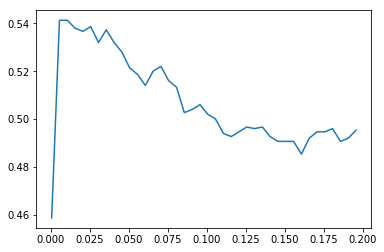

In [7]:
plt.plot(cs, scores, label='cross-val accuracy over regularization c')

In [8]:
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(penalty = "l1",C = .08)
clf.fit(X[:split,:],y[:split])
y_pred = clf.predict(X[split:,:])
roc_auc_score(y[split:], y_pred)

0.5243518456488243

In [55]:
vectorizer = CountVectorizer(ngram_range=(1, 3), token_pattern=r'\b\w+\b', min_df=1)
X = vectorizer.fit_transform(corpus)

In [58]:
scores = []
cs = []
split = 1500
for c in range(1,2001,100):
    clf = LogisticRegression(penalty = "l1",C = c/4000)
    scores.append(sum(cross_val_score(clf, X[:split,:],y[:split], cv=3))/3)
    cs.append(c/4000)
scores = np.array(scores)
cs = np.array(cs)

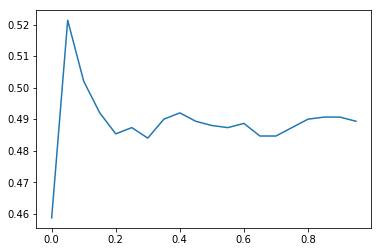

In [57]:
plt.plot(cs, scores, label='cross-val accuracy over regularization c')

In [59]:
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(penalty = "l1",C = .08)
clf.fit(X[:split,:],y[:split])
y_pred = clf.predict(X[split:,:])
roc_auc_score(y[split:], y_pred)

0.5243518456488243